<a href="https://colab.research.google.com/github/Mahidhar2210/MurderMotives/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
from numpy.linalg import matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Murder.csv')

# Print the shape of the data
print(df.shape)

# Print the column names
print(df.columns)


(494, 16)
Index(['STATE', 'YEAR', 'Gain', 'Property Dispute',
       'Personal Vendetta or Enemity', 'Love Affairs/ Sexual relations',
       'Dowry', 'Lunacy', 'Witchcraft', 'Communalism', 'Casteism',
       'Class Conflict', 'Political Reasons', 'Terrorists/ Extremists',
       'Other Causes', 'Total'],
      dtype='object')


In [5]:
df = df.drop(columns=['STATE'])

In [4]:
print(df.isnull().sum())


STATE                             0
YEAR                              0
Gain                              0
Property Dispute                  0
Personal Vendetta or Enemity      0
Love Affairs/ Sexual relations    0
Dowry                             0
Lunacy                            0
Witchcraft                        0
Communalism                       0
Casteism                          0
Class Conflict                    0
Political Reasons                 0
Terrorists/ Extremists            0
Other Causes                      0
Total                             0
dtype: int64


In [6]:
df.head()

,YEAR,Gain,Property Dispute,Personal Vendetta or Enemity,Love Affairs/ Sexual relations,Dowry,Lunacy,Witchcraft,Communalism,Casteism,Class Conflict,Political Reasons,Terrorists/ Extremists,Other Causes,Total
0,2001,122,159,332,355,96,7,20,1,1,2,39,120,1348,2602
1,2001,8,2,16,5,0,0,0,0,0,0,0,4,48,83
2,2001,94,125,83,37,62,1,3,0,1,25,2,111,812,1356
3,2001,310,888,579,178,288,4,1,0,27,6,47,22,1293,3643
4,2001,25,81,129,75,21,21,14,0,1,0,0,57,456,880


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   YEAR                            494 non-null    int64
 1   Gain                            494 non-null    int64
 2   Property Dispute                494 non-null    int64
 3   Personal Vendetta or Enemity    494 non-null    int64
 4   Love Affairs/ Sexual relations  494 non-null    int64
 5   Dowry                           494 non-null    int64
 6   Lunacy                          494 non-null    int64
 7   Witchcraft                      494 non-null    int64
 8   Communalism                     494 non-null    int64
 9   Casteism                        494 non-null    int64
 10  Class Conflict                  494 non-null    int64
 11  Political Reasons               494 non-null    int64
 12  Terrorists/ Extremists          494 non-null    int64
 13  Other

In [8]:
df.head(30)

,YEAR,Gain,Property Dispute,Personal Vendetta or Enemity,Love Affairs/ Sexual relations,Dowry,Lunacy,Witchcraft,Communalism,Casteism,Class Conflict,Political Reasons,Terrorists/ Extremists,Other Causes,Total
0,2001,122,159,332,355,96,7,20,1,1,2,39,120,1348,2602
1,2001,8,2,16,5,0,0,0,0,0,0,0,4,48,83
2,2001,94,125,83,37,62,1,3,0,1,25,2,111,812,1356
3,2001,310,888,579,178,288,4,1,0,27,6,47,22,1293,3643
4,2001,25,81,129,75,21,21,14,0,1,0,0,57,456,880
5,2001,8,0,4,4,0,0,0,0,0,0,0,0,20,36
6,2001,89,127,133,152,24,14,2,1,2,0,0,1,681,1226
7,2001,41,184,134,54,3,0,2,27,0,0,0,0,336,781
8,2001,4,16,15,11,1,0,0,0,0,0,0,0,72,119
9,2001,0,23,18,4,1,0,1,0,0,1,0,958,69,1075


In [9]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (494, 15)
No. of Rows: 494
No. of Columns: 15


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'Gain'}>,
        <Axes: title={'center': 'Property Dispute'}>,
        <Axes: title={'center': 'Personal Vendetta or Enemity'}>],
       [<Axes: title={'center': 'Love Affairs/ Sexual relations'}>,
        <Axes: title={'center': 'Dowry'}>,
        <Axes: title={'center': 'Lunacy'}>,
        <Axes: title={'center': 'Witchcraft'}>],
       [<Axes: title={'center': 'Communalism'}>,
        <Axes: title={'center': 'Casteism'}>,
        <Axes: title={'center': 'Class Conflict'}>,
        <Axes: title={'center': 'Political Reasons'}>],
       [<Axes: title={'center': 'Terrorists/ Extremists'}>,
        <Axes: title={'center': 'Other Causes'}>,
        <Axes: title={'center': 'Total'}>, <Axes: >]], dtype=object)

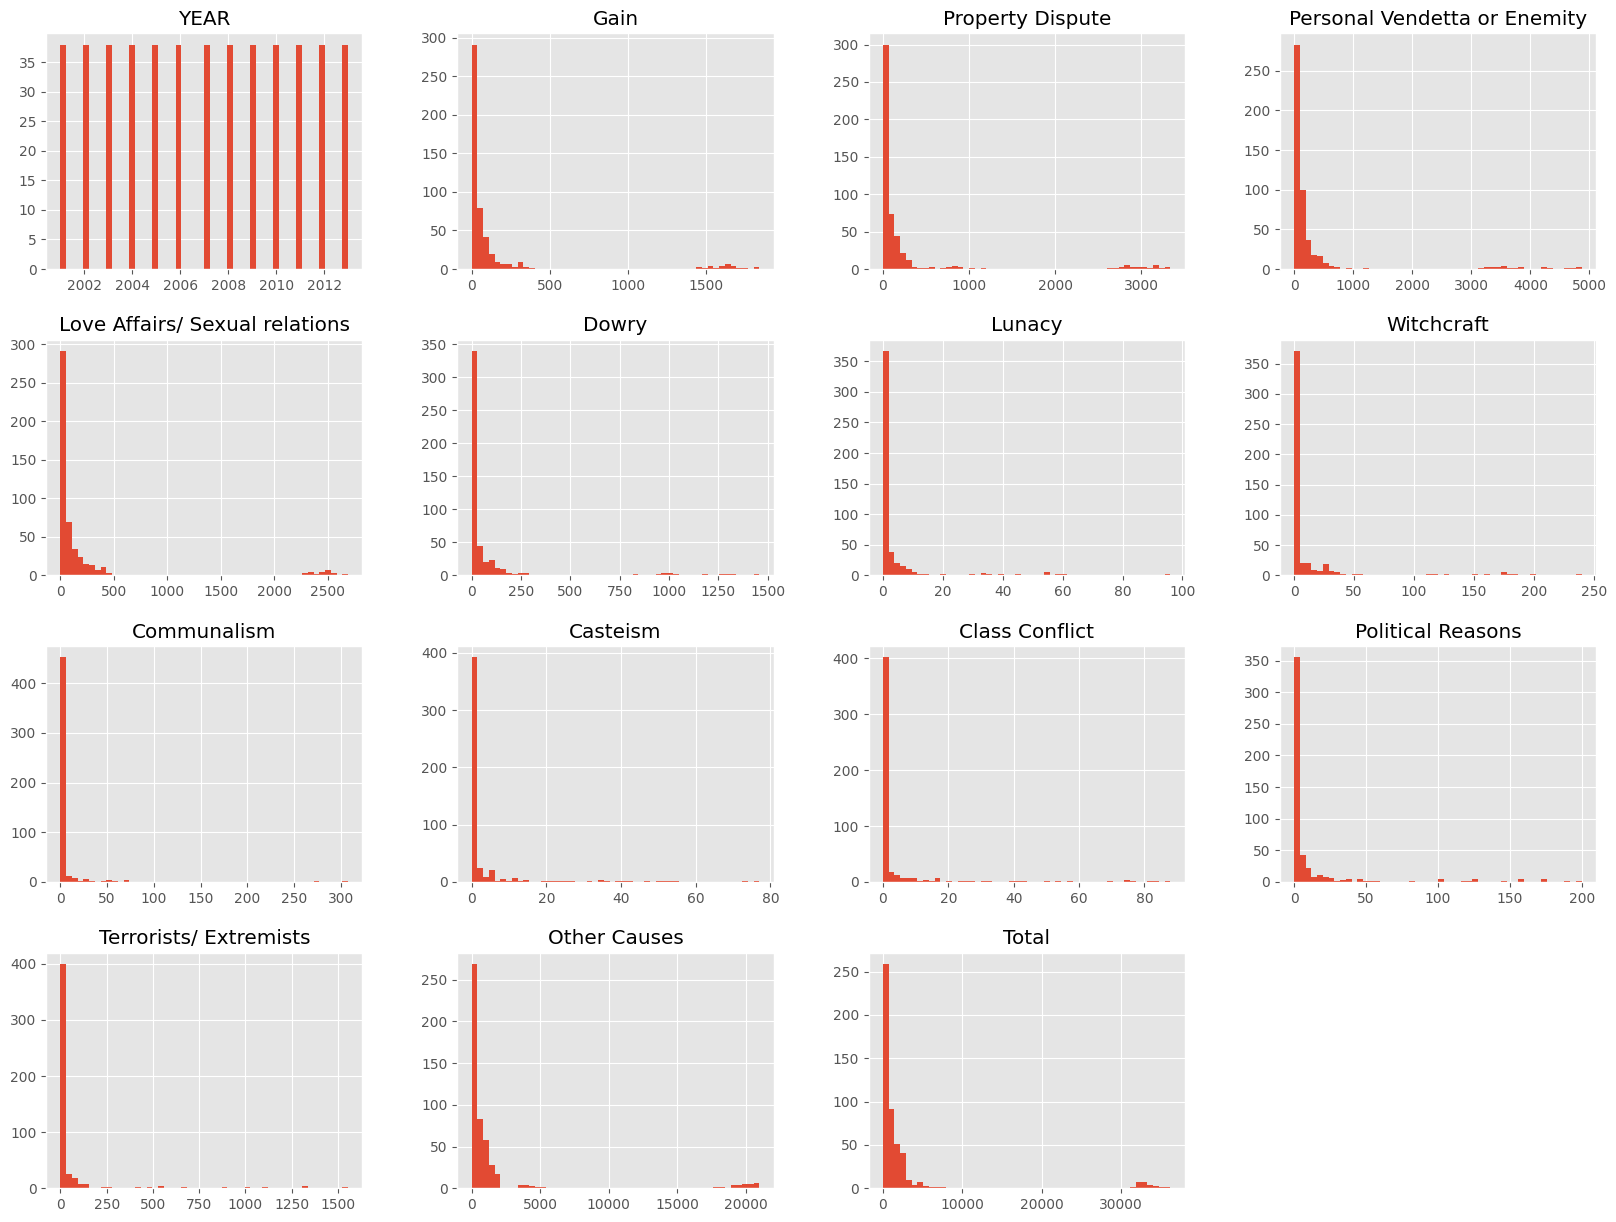

In [10]:
plt.style.use('ggplot')

df.hist(bins=50, figsize=(20,15))

In [11]:
df.corr()['Total'].sort_values(ascending=False)

Total                             1.000000
Other Causes                      0.997989
Love Affairs/ Sexual relations    0.994099
Gain                              0.992150
Personal Vendetta or Enemity      0.989875
Property Dispute                  0.986012
Dowry                             0.961398
Political Reasons                 0.948216
Witchcraft                        0.937576
Lunacy                            0.906052
Casteism                          0.892539
Class Conflict                    0.825473
Terrorists/ Extremists            0.802741
Communalism                       0.503201
YEAR                             -0.003814
Name: Total, dtype: float64

In [12]:
df.corr()

,YEAR,Gain,Property Dispute,Personal Vendetta or Enemity,Love Affairs/ Sexual relations,Dowry,Lunacy,Witchcraft,Communalism,Casteism,Class Conflict,Political Reasons,Terrorists/ Extremists,Other Causes,Total
YEAR,1.000000,0.011236,-0.002220,-0.036953,-0.002751,0.048981,-0.022171,0.025275,-0.106496,-0.031237,-0.109065,-0.046048,-0.150804,0.006302,-0.003814
Gain,0.011236,1.000000,0.991509,0.980483,0.988408,0.965259,0.896728,0.940905,0.470718,0.895857,0.809040,0.948929,0.773167,0.987415,0.992150
Property Dispute,-0.002220,0.991509,1.000000,0.983469,0.978417,0.957746,0.894341,0.927926,0.496282,0.904835,0.822589,0.950170,0.786610,0.976947,0.986012
Personal Vendetta or Enemity,-0.036953,0.980483,0.983469,1.000000,0.985269,0.937824,0.909350,0.916534,0.537430,0.906248,0.849411,0.956417,0.833587,0.981285,0.989875
Love Affairs/ Sexual relations,-0.002751,0.988408,0.978417,0.985269,1.000000,0.954830,0.903166,0.942584,0.500494,0.887161,0.824301,0.948708,0.791839,0.990701,0.994099
Dowry,0.048981,0.965259,0.957746,0.937824,0.954830,1.000000,0.870824,0.932690,0.439963,0.867017,0.779560,0.915722,0.708773,0.958475,0.961398
Lunacy,-0.022171,0.896728,0.894341,0.909350,0.903166,0.870824,1.000000,0.838853,0.466730,0.873249,0.786231,0.851408,0.755733,0.899477,0.906052
Witchcraft,0.025275,0.940905,0.927926,0.916534,0.942584,0.932690,0.838853,1.000000,0.427740,0.801016,0.739492,0.892188,0.725056,0.934159,0.937576
Communalism,-0.106496,0.470718,0.496282,0.537430,0.500494,0.439963,0.466730,0.427740,1.000000,0.492333,0.514797,0.536991,0.528118,0.488585,0.503201
Casteism,-0.031237,0.895857,0.904835,0.906248,0.887161,0.867017,0.873249,0.801016,0.492333,1.000000,0.819620,0.884579,0.750420,0.878397,0.892539


<Axes: >

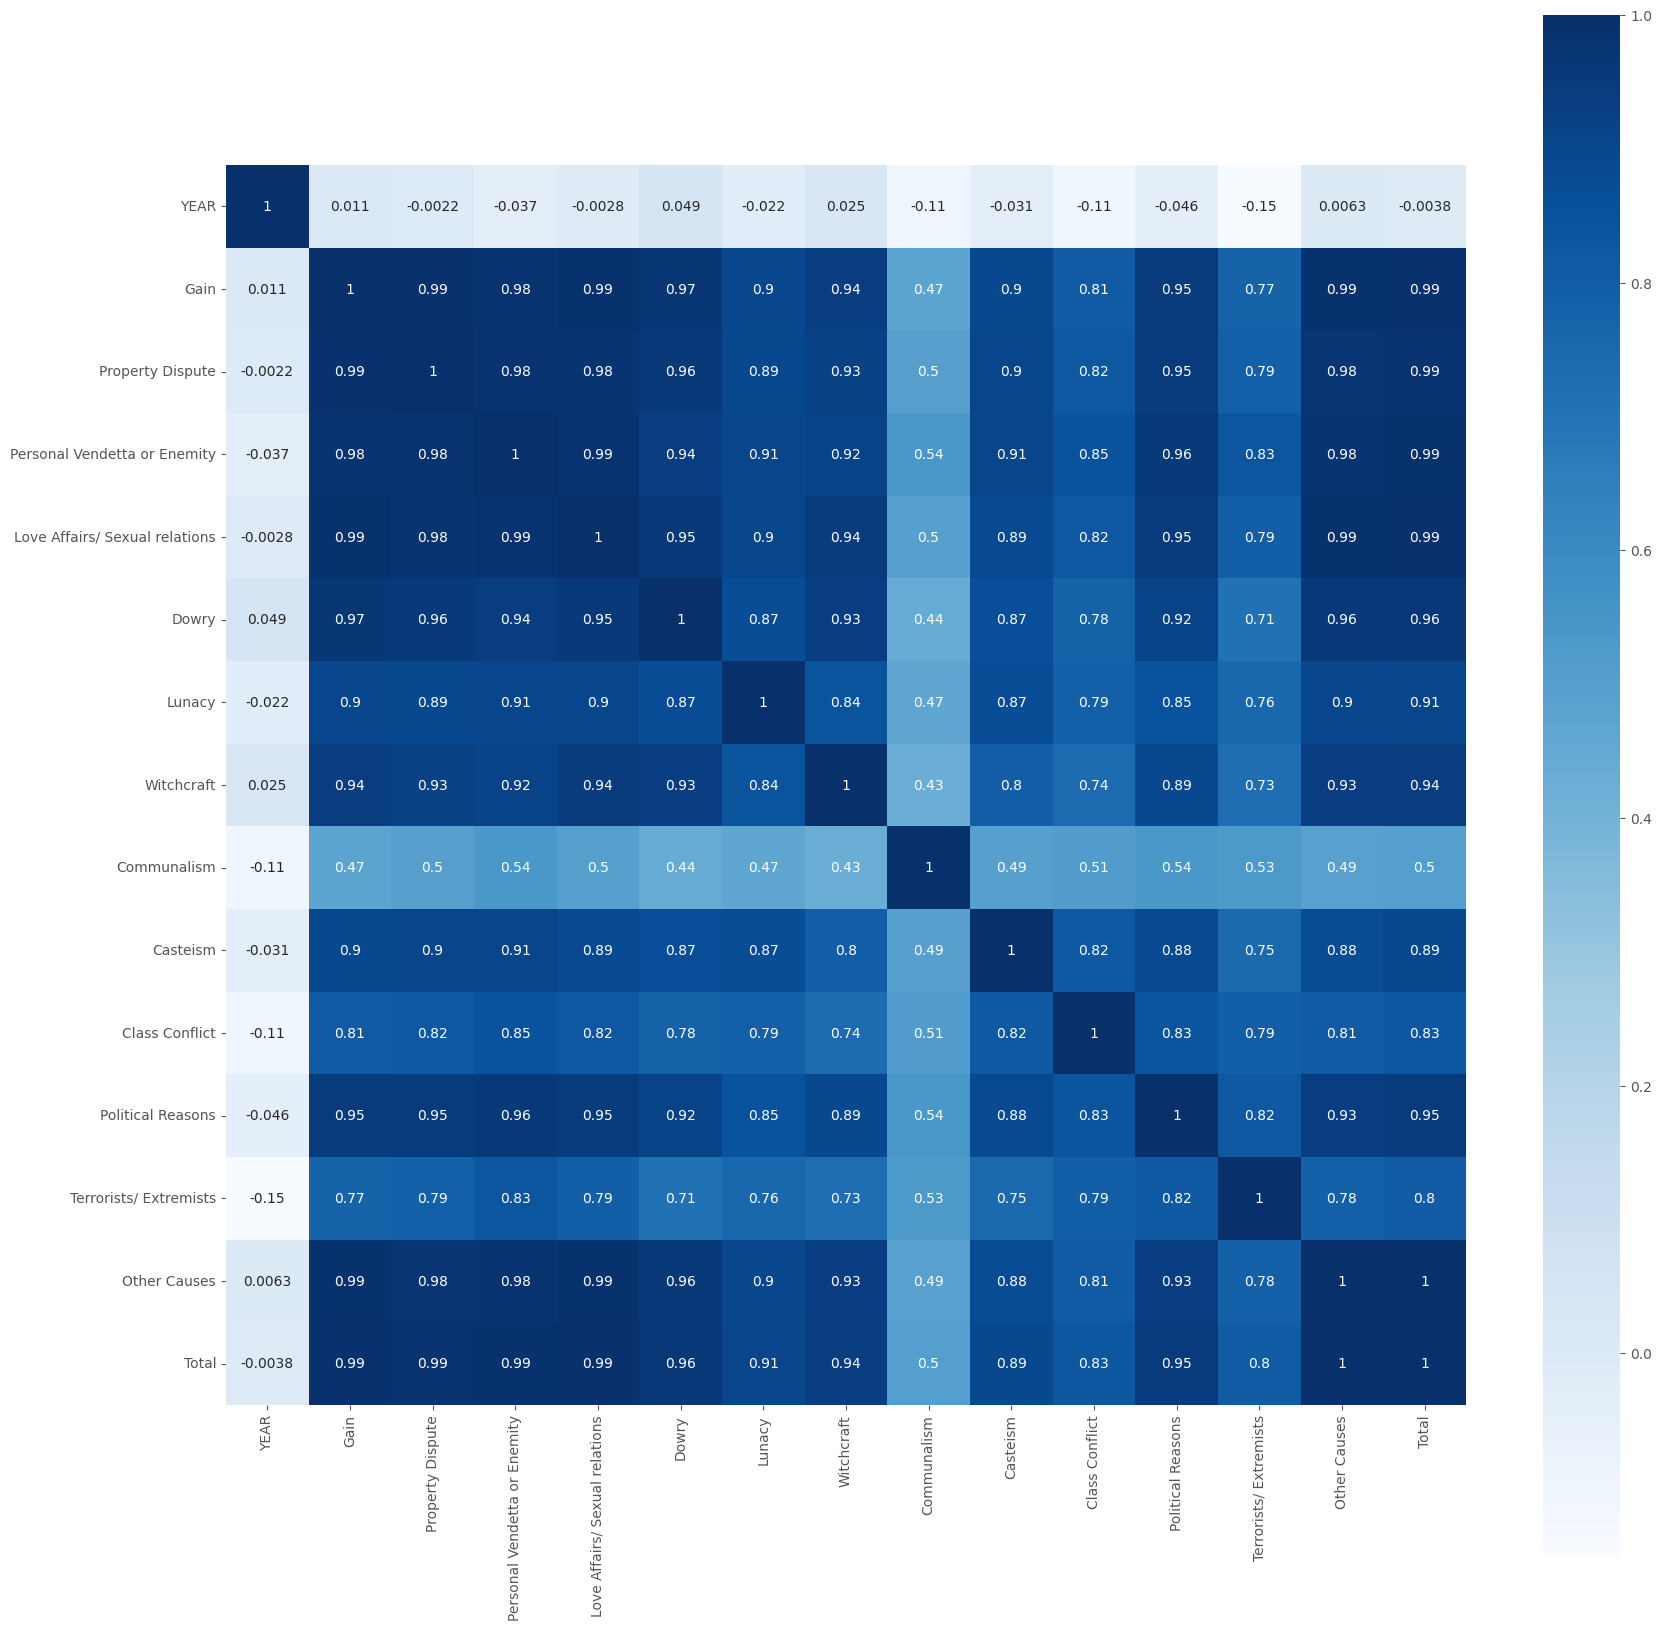

In [13]:
correlation = df.corr()

fig = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

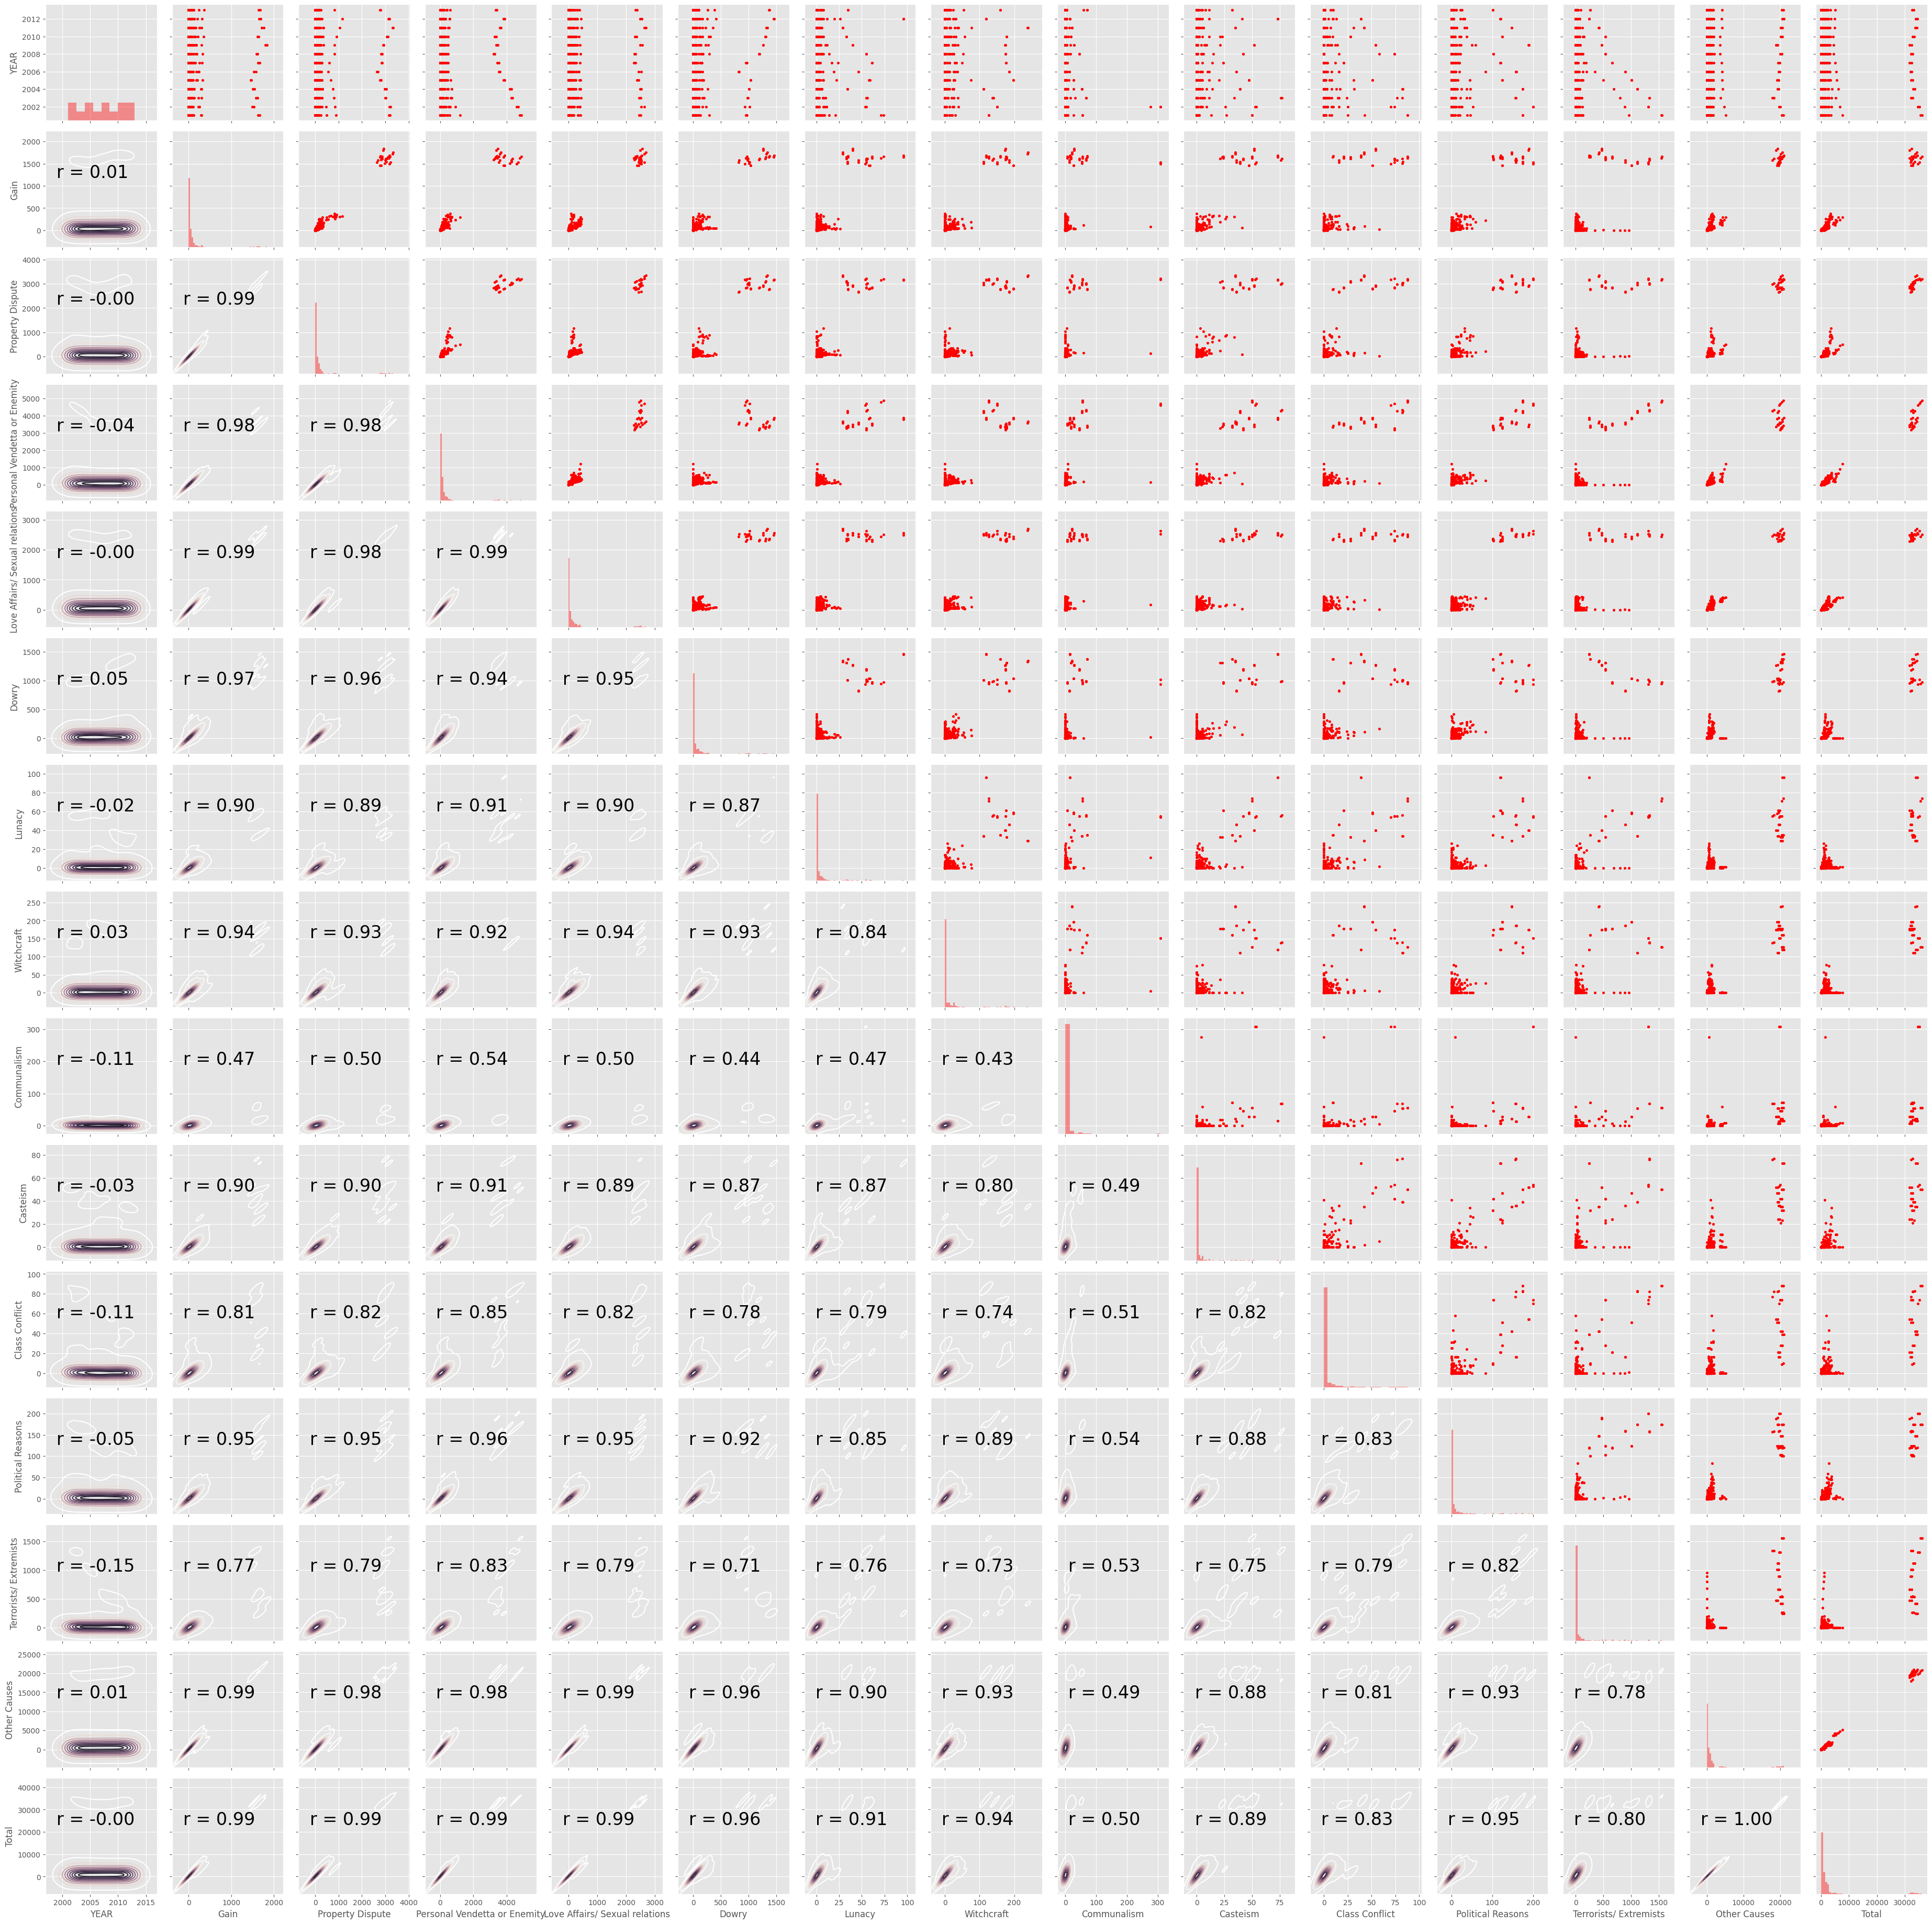

In [14]:
warnings.filterwarnings('ignore')

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [ ]:
# Make a deep copy of the data frame object. It contains all attributes (all features and the target)
allData = df.copy()

# Create separate data frame objects for X (features) and y (target)
X = df.drop(columns='Total')
y = df['Total']


# Convert the Pandas data frame object X and y into numpy arrays.
X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array

print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

X shape:  (494, 14)
y shape:  (494,)

X data type:  int64
y data type:  int64


In [ ]:
print("Rank of X:", matrix_rank(X))

Rank of X: 14


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a OLS linear regression object
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)


# The intercept
print("Intercept: \n", lin_reg.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)


print("\n----------------------------- Model Evaluation -----------------------------")


# Make prediction
y_train_predicted = lin_reg.predict(X_train)


print("\nTraining: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted))


# To compute

# Explained variance score: 1 is perfect prediction
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f"
      % r2_score(y_train, y_train_predicted))

# Explained variance score: 1 is perfect prediction
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f"
      % lin_reg.score(X_train, y_train))

Intercept: 
 2610.9949367088607
Coefficients: 
 [3.42052995e-13 3.58485898e+02 6.66277525e+02 8.50448946e+02
 5.43032462e+02 2.51792723e+02 1.21519304e+01 3.88289970e+01
 2.24476797e+01 1.03004703e+01 1.35945534e+01 3.33344676e+01
 2.14348427e+02 4.42211920e+03]

----------------------------- Model Evaluation -----------------------------

Training: Mean squared error: 0.00
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 1.00
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 1.00


In [ ]:
# Make prediction
y_test_predicted = lin_reg.predict(X_test)


print("Test: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))


# Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f"
      % r2_score(y_test, y_test_predicted))

Test: Mean squared error: 0.00
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 1.00
